## Objective
In this lab, you will analyze a customer dataset to identify key factors influencing customer churn, create visualizations to explore the data, and build a predictive model using machine learning. The goal is to extract actionable insights and present your findings in a comprehensive report.
## Scenario
You are a data analyst at a fast-growing subscription-based service company. The company is concerned about customer churn—customers canceling their subscriptions—and has tasked you with analyzing customer data. Your objectives are to identify key factors that influence churn and build a predictive model to identify customers at risk of leaving.
## Materials Provided
- A dataset (`customer_churn.csv`) preloaded into a pandas DataFrame named `df`.
- Python environment with essential libraries such as pandas, Scikit-Learn, and Matplotlib pre-installed.

## High-Level Tasks
1. **Load and Explore the Data**
2. **Data Cleaning and Preprocessing**
3. **Exploratory Data Analysis (EDA) and Visualization**
4. **Machine Learning Model Building and Evaluation**
5. **Presenting Findings in a Comprehensive Report**

## Lab Instructions
### 1. Load and Explore the Data (5 minutes)
#### Step 1.1: Import the required Python library and load dataset.
Code is provided.

In [23]:
import pandas as pd 
df = pd.read_csv("customer_churn.csv")

# Display the first 5 rows of the DataFrame
df.head()

,Unnamed: 0,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,0,128,Yes,1,2.7,1,265.1,110,89.0,9.87,10.0
1,1,0,107,Yes,1,3.7,1,161.6,123,82.0,9.78,13.7
2,2,0,137,Yes,0,0.0,0,243.4,114,52.0,6.06,12.2
3,3,0,84,No,0,0.0,2,299.4,71,57.0,3.10,6.6
4,4,0,75,No,0,0.0,3,166.7,113,41.0,7.42,10.1


#### Step 1.2: Examine Column Names and Data Types
Inspect the column names and data types using `df.info()`. (code provided)

In [24]:
# Display column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3333 non-null   int64  
 1   Churn            3333 non-null   int64  
 2   AccountWeeks     3333 non-null   int64  
 3   ContractRenewal  3333 non-null   object 
 4   DataPlan         3333 non-null   int64  
 5   DataUsage        3333 non-null   float64
 6   CustServCalls    3333 non-null   int64  
 7   DayMins          3333 non-null   float64
 8   DayCalls         3333 non-null   int64  
 9   MonthlyCharge    3333 non-null   float64
 10  OverageFee       3333 non-null   float64
 11  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6), object(1)
memory usage: 312.6+ KB


#### Step 1.3: Get Summary Statistics
Get summary statistics of numerical columns using `df.describe()`. (code provided)

In [25]:
# Get summary statistics of numerical columns
df.describe()

,Unnamed: 0,Churn,AccountWeeks,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,1666.00000,0.144914,101.064806,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,962.29855,0.352067,39.822106,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,833.00000,0.000000,74.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,1666.00000,0.000000,101.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,2499.00000,0.000000,127.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,3332.00000,1.000000,243.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


#### Step 1.4: Remove CSV Index Column
The index from the CSV turned into a column and should be dropped. Use `df.drop` to get rid of the `Unnamed: 0` column. Then use `df.describe()` again to confirm the column is removed.

In [26]:
# Drop the "Unnamed: 0" column
df = df.drop('Unnamed: 0', axis = 1)

# Use df.describe() to confirm the column was removed (code provided)
df.describe()

# Expected shape of DataFrame is (3333,11) after dropping column. 
# Ensure the results are stored in the df variable
print(f"Shape: {df.shape}. Expected is (3333, 11)")

Shape: (3333, 11). Expected is (3333, 11)


#### Check Your Results:

In [27]:
# Checking DataFrame (df) shape
print(f"Shape: {df.shape}.")

Shape: (3333, 11).


#### Step 1.5: Identify Potential Features and Target Variable, and Encode ContractRenewal
Select all features from the dataset, except churn (e.g., `"AccountWeeks"`, `"DataPlan"`, `"Data Usage"`, etc) and set the target variable (`'churn'`).

You are provided the code for one-hot encoding the `ContractRenewal` column. This column currently has text values ("Yes" or "No"). pd.get_dummies() converts these text values into numerical 1s and 0s. It creates new columns (`'ContractRenewal_Yes'`, `'ContractRenewal_No'`). A 'Yes' becomes a 1 in the 'Yes' column and 0 in the 'No' column, and vice versa. This allows us to use this information effectively in our machine learning models and in charts.

In [28]:
# Select all features and set target variable
### YOUR CODE HERE ###
features = df.drop('Churn', axis = 1)
target_variable = df['Churn']


# One-hot encoding for 'ContractRenewal' feature (provided; do not change)
features = pd.get_dummies(features,columns=['ContractRenewal'],dtype=int)
# See results with one-hot encoding (Notice last 2 columns)
features.head()

# Expected shape of features DataFrame is (3333,11) after one-hot encoding. 
print(f"features shape: {features.shape}. Expected is (3333, 11)")
# Expected shape of target_variable DataFrame is (3333,).
print(f"target_variable shape: {target_variable.shape}. Expected is (3333,)")

features shape: (3333, 11). Expected is (3333, 11)
target_variable shape: (3333,). Expected is (3333,)


#### Check Your Results:

In [29]:
# Checking DataFrame (features and target_variable) shapes

### 2. Data Cleaning and Preprocessing (5 minutes)
#### Step 2.1: Split the Data
Split the data into training and testing sets (70% train, 30% test) using `train_test_split` from Scikit-Learn. 

Make sure to set the `random_state` parameter to 42 to ensure reproducibility and obtain the same results as the expected solution.

In [30]:
from sklearn.model_selection import train_test_split
# Assume "x" is features and "y" is target_variables
x = features 
y = target_variable

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(x_train.shape) # Expected (2333,11)
print(x_test.shape) # Expected (1000,11)
print(y_train.shape) # Expected (2333,)
print(y_test.shape) # Expected (1000,)

(2333, 11)
(1000, 11)
(2333,)
(1000,)


#### Check Your Results:

In [31]:
# Checking DataFrame (features and target_variable) shapes

### 3. Exploratory Data Analysis (EDA) and Visualization (20 minutes)
#### Step 3.1: Summary Statistics for Relevant Features
Calculate and print summary statistics for relevant features (average tenure for churned vs. non-churned customers).

In [32]:
# Summary statistics for churned vs. non-churned customers
churned = df[df['Churn'] == 1]
non_churned = df[df['Churn'] == 0]

# Print average tenure
avg_tenure = df.groupby(['Churn'])['AccountWeeks'].mean()
print(avg_tenure)

Churn
0    100.793684
1    102.664596
Name: AccountWeeks, dtype: float64


#### Step 3.2: Create Visualizations
Create visualizations (bar chart, histogram, and box plot) to explore the relationships between features and the target variable (`'churn'`). The titles, labels, and commands to show the plots have been provided; you will just need to set up the plots in each cell below.

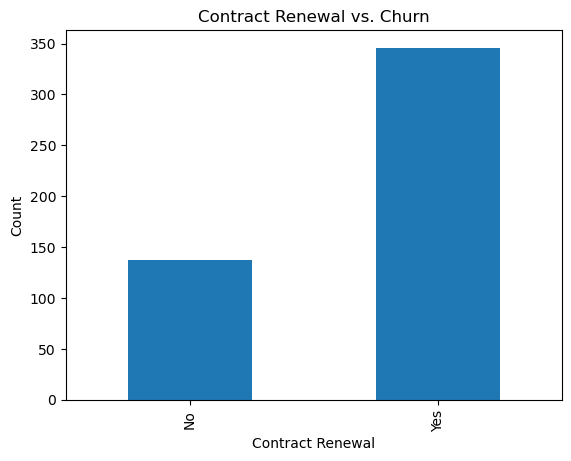

In [33]:
import matplotlib.pyplot as plt

# Bar chart for contract renewal vs churn
churn_counts = df.groupby('ContractRenewal')['Churn'].agg('sum')

# Chart options provided
churn_counts.plot(kind='bar', stacked=True)
plt.title('Contract Renewal vs. Churn')
plt.xlabel('Contract Renewal')
plt.ylabel('Count')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


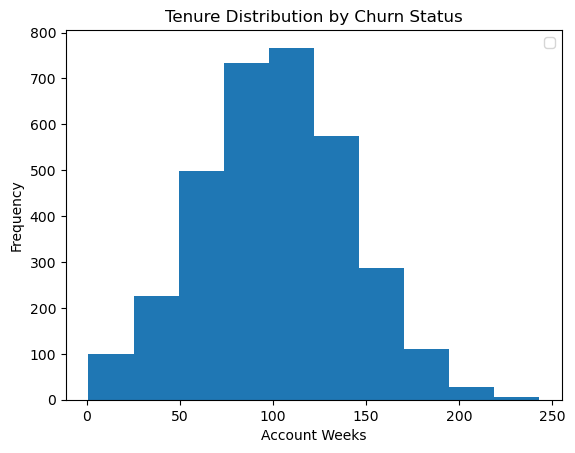

In [34]:
import matplotlib.pyplot as plt

# Histogram for tenure distribution
plt.hist(df['AccountWeeks'])

# Chart options provided
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Account Weeks')
plt.ylabel('Frequency')
plt.legend()
plt.show()

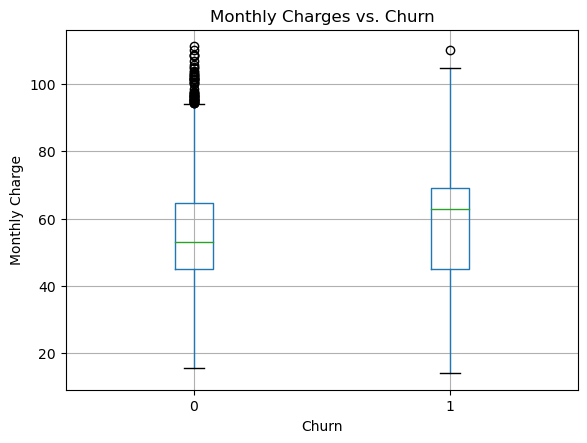

In [35]:
import matplotlib.pyplot as plt

# Box plot for monthly charges
df.boxplot(column=["MonthlyCharge"], by="Churn")

# Chart options provided
plt.title('Monthly Charges vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charge')
plt.suptitle('')  # Remove the default suptitle
plt.show()

#### Step 3.3: Interpret Visualizations
Interpret the visualizations and identify key insights about factors influencing churn.  Enter your observations in the cell below. These will not be graded, but this may be useful if you want to add this to your portfolio.

Enter your observations about the visualizations here:

- Observation 1: Many people who renew their contracts still churn. Therefore, there might be an issue with the subscription's service long term sustainance of benefits. 
- Observation 2: From the histogram plot, we see that most subscribers hold their account for about 125 weeks. These could be pointing to a possible exhaustion of content. If nothing relevant to a customer is being served to the customer and there is nothing compelling to hold anyone who has had the opportinity to utilize most contents by that time period, a customer will likely opt out.
- Observation 3: From the boxplot, we can see that the 25th to 50th percentile of people who churn go beyond the monthly charge of people who do not churn. This also happens with the 75th to 100th percentile of population. This could infer higher monethly subscrition charges is often favorable for many people who decide to opt of of the subscription.

### 4. Machine Learning Model Building and Evaluation (20 minutes)
#### Step 4.1: Choose a Classification Algorithm and Train the Model
Import a suitable classification algorithm (`LogisticRegression` in this case) and create an instance of it (provided). 

Setting `max_iter = 1000` in our Logistic Regression model means we're giving it a limit of 1000 attempts to learn the optimal patterns in the data, which is often a good initial value to allow for convergence without excessive training time, though the ideal number can vary depending on the specific dataset.

In [36]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression model (provided)
model = LogisticRegression(max_iter = 1000)

# Train the model
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

#### Step 4.2: Make Predictions
Use the trained model to make predictions on the testing data.

In [37]:
# Make predictions on the test set
y_pred = model.predict(x_test)

#### Step 4.3: Evaluate the Model
Evaluate the model's performance using appropriate metrics (`accuracy`, `precision`, `recall`, `f1`).

**Note:** For grading purposes, calculate and store each of these metrics in the following variables:
- `accuracy`
- `precision`
- `recall`
- `f1`

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model
# Round all values to 3 decimal places

accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)
recall = round(recall_score(y_test, y_pred), 3)
f1 = round(f1_score(y_test, y_pred), 3)

print(f"Accuracy: {accuracy}") # Expected: approximately 0.867
print(f"Precision: {precision}") # Expected: approximately 0.604
print(f"Recall: {recall}") # Expected: approximately 0.203
print(f"F1 Score: {f1}") # Expected: approximately 0.304

Accuracy: 0.866
Precision: 0.596
Recall: 0.196
F1 Score: 0.295


#### Check Your Results:

In [ ]:
# Checking accuracy
print(f"Accuracy: {accuracy}")

In [ ]:
# Checking precision
print(f"Precision: {precision}")

In [ ]:
# Checking recall
print(f"Recall: {recall}")

In [ ]:
# Checking f1
print(f"F1 Score: {f1}")

### 5. Presenting Findings in a Comprehensive Report
#### Step 5.1: Compile the Results
Compile your analysis, visualizations, and model evaluation results into a comprehensive report. Fill them in as directed below. This will not be graded, but may be useful if you want to add this to your portfolio.
- `Introduction:` Write a sentence or two describing the purpose of this analysis.
- `Data Exploration:` Write a sentence or two highlighting the key factors in customer churn.
- `Model Building and Evaluation:` Write a sentence or two describing how your model was trained, and the accuracy, precision, and recall rates.
- `Key Insights:` Add two or three bullet points summarizing your findings.
- `Recommendations:` Add two or three bullet points with the recommendations you would make based on this analysis.

# Customer Churn Analysis Report

## Introduction
- This study analyzes a customer data on churning for a subscripton-based organization. With the analysis, we identify key factors that influence churn and build a predictive model to identify customers at risk of leaving.


## Data Exploration
- Customer churn is usually driven by various factors such as money and services available. This study highlights the possibility of customers churning due to high monthly subscription charges and a possible decline is benefits offered by the service considering customers churn more even with constract renewals.


## Model Building and Evaluation
- We trained our model on 70% of the data, leaving 30% percent for prediction. We utillized the Logistic Gregression Model which worlks well in classification problems like predicting customer churn. Though the model prredicts the test data well, the probability that the model correctly predicts churn from all its predictions is only about 0.6 with an even worse probabibilty of recognizing customers who churn from all customers that churn.


## Key Insights
- This data identifies some possible reasons of customer-churn as high monthly-subscription fee, and reducing lack of interest in subscription after a certain number of weeks with the service.
- The model used to train the data shows high accuracy but low performance in identifying customers that actually churn from the given data of churned customers.
- The model can be improved by selecting a higher percentage of training set and/or increasing the number of maximum iterations. Because these updates might lead to overfitting, another improvement could be imcoporation a model with cross validation techniques.


## Recommendations
- Creating lower-tier subscription deals that can draw customers with lower money to commit.
- Engaging customers through developments that can enable staying power of customers and attract new subscriptions also. For example, alluring plans that can cater towards a customer's pocket through family plan deals and the likes.

## Hints & Tips
- Use the "pandas cheat sheet" for quick syntax reference on DataFrame operations.
- Check the "Scikit-Learn documentation" for examples and explanations of classification models.
- Use Matplotlib for creating informative visualizations. Reference various materials in Course 2.

Good luck with your customer churn analysis!